# Graph Algorithms (BFS, DFS, Shortest Paths) using Python

### Part 5 of "Data Structures and Algorithms in Python"

[Data Structures and Algorithms in Python](https://jovian.ai/learn/data-structures-and-algorithms-in-python) is a beginner-friendly introduction to common data structures (linked lists, stacks, queues, graphs) and algorithms (search, sorting, recursion, dynamic programming) in Python, designed to help you prepare for coding interviews and assessments. 

Ask questions, get help & participate in discussions on the [course community forum](https://jovian.ai/forum/c/data-structures-and-algorithms-in-python/78). Earn a verified certificate of accomplishment for this course by signing up here: http://pythondsa.com.  



### How to Run the Code

The best way to learn the material is to execute the code and experiment with it yourself. This tutorial is an executable [Jupyter notebook](https://jupyter.org). You can _run_ this tutorial and experiment with the code examples in a couple of ways: *using free online resources* (recommended) or *on your computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing the code is to click the **Run** button at the top of this page and select **Run on Binder**. You can also select "Run on Colab" or "Run on Kaggle", but you'll need to create an account on [Google Colab](https://colab.research.google.com) or [Kaggle](https://kaggle.com) to use these platforms.


#### Option 2: Running on your computer locally

To run the code on your computer locally, you'll need to set up [Python](https://www.python.org), download the notebook and install the required libraries. We recommend using the [Conda](https://docs.conda.io/projects/conda/en/latest/user-guide/install/) distribution of Python. Click the **Run** button at the top of this page, select the **Run Locally** option, and follow the instructions.



## Graphs in the Real World

### Railway network

![](https://i.imgur.com/uSF6AEJ.png)

### Flight routes

![](https://www.mapsales.com/products/mapsofworld/images/zoom/world-air-route-wall-map.gif)

### Hyperlinks

![](https://i.imgur.com/hlGDYn2.png)

## Graph Data Structure

![](https://i.imgur.com/xkgMnwx.png)



In [7]:
# do not use this method to create empty lists
l1 = [[]] * 10
l1
l1[0].append(1)
l1

[[1], [1], [1], [1], [1], [1], [1], [1], [1], [1]]

In [8]:
# use this method 
l2 = [[] for __ in range(10)]  # use __ if item not being used

In [9]:
l2[0].append(1)
l2

[[1], [], [], [], [], [], [], [], [], []]

In [4]:
num_nodes = 5
edges = [(0, 1), (0, 4), (1, 2), (1, 3), (1, 4), (2, 3), (3, 4)]

In [11]:
num_nodes, len(edges)

(5, 7)

### Adjacency Lists

![](https://i.imgur.com/rgMwkIW.png)


> **Question**: Create a class to represent a graph as an adjacency list in Python

In [12]:
class Graph:
    def __init__(self, num_nodes, edges):
        self.num_nodes = num_nodes
        self.data = [[] for __ in range(num_nodes)]
        for e1, e2 in edges:
            print('e1:', e1, 'e2:', e2)
            self.data[e1].append(e2)
            self.data[e2].append(e1)
    
    def __repr__(self):
        return '\n'.join(['{}: {}'.format(n, neighbors) for n, neighbors in enumerate(self.data)])
    
    def __str__(self):
        return self.__repr__()

In [13]:
graph1 = Graph(num_nodes, edges)
graph1.data

e1: 0 e2: 1
e1: 0 e2: 4
e1: 1 e2: 2
e1: 1 e2: 3
e1: 1 e2: 4
e1: 2 e2: 3
e1: 3 e2: 4


[[1, 4], [0, 2, 3, 4], [1, 3], [1, 2, 4], [0, 1, 3]]

In [14]:
# what does ennumerate do?
for i, val in enumerate([5, 3, 4, 1]):
    print (i, val)

0 5
1 3
2 4
3 1


In [15]:
graph1

0: [1, 4]
1: [0, 2, 3, 4]
2: [1, 3]
3: [1, 2, 4]
4: [0, 1, 3]

> **Question**: Write a function to add an edge to a graph represented as an adjacency list. 

> **Question**: Write a function to remove an edge from a graph represented as a adjacency list.


In [16]:
class Graph:
    def __init__(self, num_nodes, edges):
        self.num_nodes = num_nodes
        self.data = [[] for __ in range(num_nodes)]
        for e1, e2 in edges:
            print('e1:', e1, 'e2:', e2)
            self.data[e1].append(e2)
            self.data[e2].append(e1)
    
    # function to add an edge
    def add_edge(self, edge):
        e1, e2 = edge
#         print('e1:', e1, 'e2:', e2)
        if e2 in self.data[e1] and e1 in self.data[e2]:
            print('edge not added')
            return
        self.data[e1].append(e2)
        self.data[e2].append(e1)
        # for testing
        print('edge added')
        return e1, e2
    
    # function to remove an edge
    def remove_edge(self, edge):
        e1, e2 = edge
#         print('e1:', e1, 'e2:', e2)
        if e2 in self.data[e1] and e1 in self.data[e2]:
            self.data[e1].remove(e2)
            self.data[e2].remove(e1)
            return e1, e2
    
    def __repr__(self):
        return '\n'.join(['{}: {}'.format(n, neighbors) for n, neighbors in enumerate(self.data)])
    
    def __str__(self):
        return self.__repr__()

In [17]:
graph1 = Graph(num_nodes, edges)

e1: 0 e2: 1
e1: 0 e2: 4
e1: 1 e2: 2
e1: 1 e2: 3
e1: 1 e2: 4
e1: 2 e2: 3
e1: 3 e2: 4


In [18]:
from jovian.pythondsa import evaluate_test_cases

In [19]:
test0 = {
    'input': {
        'edge': (1, 4)
    },
    'output': None
}

test1 = {
    'input': {
        'edge': (0, 3)
    },
    'output': (0, 3)
}

test2 = {
    'input': {
        'edge': (1, 3)
    },
    'output': None
}

test3 = {
    'input': {
        'edge': (4, 2)
    },
    'output': (4, 2)
}

test4 = {
    'input': {
        'edge': (3, 2)
    },
    'output': None
}

In [20]:
tests = [test0, test1, test2, test3, test4]

In [21]:
evaluate_test_cases(graph1.add_edge, tests)


TEST CASE #0
edge not added

Input:
{'edge': (1, 4)}

Expected Output:
None


Actual Output:
None

Execution Time:
0.03 ms

Test Result:
PASSED


TEST CASE #1
edge added

Input:
{'edge': (0, 3)}

Expected Output:
(0, 3)


Actual Output:
(0, 3)

Execution Time:
0.027 ms

Test Result:
PASSED


TEST CASE #2
edge not added

Input:
{'edge': (1, 3)}

Expected Output:
None


Actual Output:
None

Execution Time:
0.024 ms

Test Result:
PASSED


TEST CASE #3
edge added

Input:
{'edge': (4, 2)}

Expected Output:
(4, 2)


Actual Output:
(4, 2)

Execution Time:
0.025 ms

Test Result:
PASSED


TEST CASE #4
edge not added

Input:
{'edge': (3, 2)}

Expected Output:
None


Actual Output:
None

Execution Time:
0.024 ms

Test Result:
PASSED


SUMMARY

TOTAL: 5, PASSED: 5, FAILED: 0


[(None, True, 0.03),
 ((0, 3), True, 0.027),
 (None, True, 0.024),
 ((4, 2), True, 0.025),
 (None, True, 0.024)]

In [22]:
graph1

0: [1, 4, 3]
1: [0, 2, 3, 4]
2: [1, 3, 4]
3: [1, 2, 4, 0]
4: [0, 1, 3, 2]

In [23]:
test0 = {
    'input': {
        'edge': (1, 4),
    },
    'output': (1, 4)
}

test1 = {
    'input': {
        'edge': (0, 3),
    },
    'output': (0, 3)
}

test2 = {
    'input': {
        'edge': (0, 3),
    },
    'output': None
}

test3 = {
    'input': {
        'edge': (4, 2),
    },
    'output': (4, 2)
}

test4 = {
    'input': {
        'edge': (3, 2),
    },
    'output': (3, 2)
}

test5 = {
    'input': {
        'edge': (2, 5),
    },
    'output': None
}

test6 = {
    'input': {
        'edge': (6, 4),
    },
    'output': None
}

test7 = {
    'input': {
        'edge': (2, 8),
    },
    'output': None
}

In [24]:
tests = [test0, test1, test2, test3, test4, test5, test6, test7]

In [25]:
evaluate_test_cases(graph1.remove_edge, tests)


TEST CASE #0

Input:
{'edge': (1, 4)}

Expected Output:
(1, 4)


Actual Output:
(1, 4)

Execution Time:
0.005 ms

Test Result:
PASSED


TEST CASE #1

Input:
{'edge': (0, 3)}

Expected Output:
(0, 3)


Actual Output:
(0, 3)

Execution Time:
0.005 ms

Test Result:
PASSED


TEST CASE #2

Input:
{'edge': (0, 3)}

Expected Output:
None


Actual Output:
None

Execution Time:
0.003 ms

Test Result:
PASSED


TEST CASE #3

Input:
{'edge': (4, 2)}

Expected Output:
(4, 2)


Actual Output:
(4, 2)

Execution Time:
0.004 ms

Test Result:
PASSED


TEST CASE #4

Input:
{'edge': (3, 2)}

Expected Output:
(3, 2)


Actual Output:
(3, 2)

Execution Time:
0.003 ms

Test Result:
PASSED


TEST CASE #5

Input:
{'edge': (2, 5)}

Expected Output:
None


Actual Output:
None

Execution Time:
0.003 ms

Test Result:
PASSED


TEST CASE #6


IndexError: list index out of range

In [ ]:
graph1

In [ ]:
# https://youtu.be/SmOrBW22R2k?t=1846

In [ ]:
!pip install jovian --upgrade --quiet

In [ ]:
import jovian

In [ ]:
jovian.commit()

### Adjacency Matrix

![](https://i.imgur.com/oswYKTW.png)

> **Question**: Represent a graph as an adjacency matrix in Python

In [ ]:
# note the difference in initializing an array
arr = [[0] * num_nodes ] * num_nodes # wrong
arr[0][0] = 1
print(arr)
arr = [[0 for __ in range(num_nodes)] for __ in range(num_nodes)] # correct
arr[0][0] = 1
print(arr)

In [ ]:
class Graph:
    def __init__(self, num_nodes, edges):
        self.num_nodes = num_nodes
        self.data = [[0 for __ in range(num_nodes)] for __ in range(num_nodes)]
        for e1, e2 in edges:
            print('e1:', e1, 'e2:', e2)
            self.data[e1][e2] = 1
            self.data[e2][e1] = 1
    
    def __repr__(self):
        return '\n'.join([' '.join([str(cell) for cell in row]) for row in self.data])
    
    def __str__(self):
        return self.__repr__()

In [ ]:
graph1 = Graph(num_nodes, edges)
graph1

## Graph Traversal


### Breadth-First Search

A real-world graph:

![](https://upload.wikimedia.org/wikipedia/commons/thumb/a/ad/MapGermanyGraph.svg/500px-MapGermanyGraph.svg.png)

Breadth-first search tree (starting from Frankfurt):

![](https://upload.wikimedia.org/wikipedia/commons/thumb/6/63/GermanyBFS.svg/500px-GermanyBFS.svg.png)

> **Question**: Implement breadth-first search given a source node in a graph using Python.


<img src="https://i.imgur.com/E2Up1Pk.png" width="400">

BFS pseudocode (Wikipedia):

```
 1  procedure BFS(G, root) is
 2      let Q be a queue
 3      label root as discovered
 4      Q.enqueue(root)
 5      while Q is not empty do
 6          v := Q.dequeue()
 9          for all edges from v to w in G.adjacentEdges(v) do
10              if w is not labeled as discovered then
11                  label w as discovered
12                  Q.enqueue(w)
```



<img src="https://cdn.programiz.com/sites/tutorial2program/files/queue-implementation.png" width="400">

In [ ]:
class Graph:
    def __init__(self, num_nodes, edges):
        self.num_nodes = num_nodes
        self.data = [[] for __ in range(num_nodes)]
        for e1, e2 in edges:
            self.data[e1].append(e2)
            self.data[e2].append(e1)
    
    # function to add an edge
    def add_edge(self, edge):
        e1, e2 = edge
        if e2 in self.data[e1] and e1 in self.data[e2]:
            print('edge not added')
            return
        self.data[e1].append(e2)
        self.data[e2].append(e1)
        print('added', edge) # for testing
    
    # function to remove an edge
    def remove_edge(self, edge):
        e1, e2 = edge
        if e2 in self.data[e1] and e1 in self.data[e2]:
            self.data[e1].remove(e2)
            self.data[e2].remove(e1)
            print('removed', edge)
    
    def __repr__(self):
        return '\n'.join(['{}: {}'.format(n, neighbors) for n, neighbors in enumerate(self.data)])
    
    def __str__(self):
        return self.__repr__()

In [ ]:
def bfs(graph, root):
    queue = [] # start a queue
    bfs = [] 
    discovered = [False] * len(graph.data)
    # additional vals to track
    dist = [None] * len(graph.data)
    parent = [None] * len(graph.data)
    
    # set root to be discovered
    discovered[root] = True 
    dist[root] = 0
    queue.append(root)
    
    while queue:
        # implement a dequeue in python
        curr = queue.pop(0)
        bfs.append(curr)
        
        # check all edges of current
        for node in graph.data[curr]:  # list of all nodes connected with current node
            if not discovered[node]:
                discovered[node] = True
                queue.append(node)
                # additional vals to track
                dist[node] = 1 + dist[curr]
                parent[node] = curr     
    
    # return queue - list of nodes as they would be visited in a bread-first search
    return bfs, dist, parent

In [32]:
graph1 = Graph(num_nodes, edges)
graph1

e1: 0 e2: 1
e1: 0 e2: 4
e1: 1 e2: 2
e1: 1 e2: 3
e1: 1 e2: 4
e1: 2 e2: 3
e1: 3 e2: 4


0: [1, 4]
1: [0, 2, 3, 4]
2: [1, 3]
3: [1, 2, 4]
4: [0, 1, 3]

In [ ]:
bfs(graph1, 3)

<img src="https://i.imgur.com/E2Up1Pk.png" width="400">

In [ ]:
bfs(graph1, 0)

In [ ]:
bfs(graph1, 4)

In [ ]:
bfs(graph1, 1)

In [ ]:
bfs(graph1, 2)

In [ ]:
import jovian

In [ ]:
jovian.commit()

> **Question**: Write a program to check if all the nodes in a graph are connected

![](http://www.martinbroadhurst.com/images/connected_components.png)

In [ ]:
num_nodes3 = 9
edges3 = [(0, 1), (0, 3), (1, 2), (2, 3), (4, 5), (4, 6), (5, 6), (7, 8)]
num_nodes3, len(edges3)

In [ ]:
graph3 = Graph(num_nodes3, edges3)

In [ ]:
graph3

In [ ]:
# use bfs to determine if all nodes in a graph are connected
# check length of bfs list against total num of nodes
# if not connected, will not show up in bfs list
# therefore, if len(bfs) < num_nodes return false otherwise true

In [ ]:
def check_connected(graph, root):
    queue = [] # start a queue
    bfs = []
    discovered = [False] * len(graph.data)

    # set root to be discovered
    discovered[root] = True 
    queue.append(root)
    
    while queue:
        # implement a dequeue in python
        curr = queue.pop(0)
        bfs.append(curr)
        
        # check all edges of current
        for node in graph.data[curr]:  # list of all nodes connected with current node
            if not discovered[node]:
                discovered[node] = True
                queue.append(node)    
    
    print('bfs:', bfs)
    # return queue - list of nodes as they would be visited in a bread-first search
    return False if len(bfs) < len(graph.data) else True

In [ ]:
check_connected(graph3, 3)

In [ ]:
# add 2 edges to connect all nodes
graph3.add_edge((2,4))
graph3.add_edge((6,7))

In [ ]:
check_connected(graph3, 3)

In [ ]:
# they should all return true as all nodes are connected
for i in range(num_nodes3):
    print('true') if check_connected(graph3, i) else print('false')

In [ ]:
# remove an edge to disconnect nodes
graph3.remove_edge((6,7))

In [ ]:
# expected false
check_connected(graph3, 6)

In [ ]:
for i in range(num_nodes):
    print('true') if check_connected(graph1, i) else print('false')

In [ ]:
graph1.remove_edge((0,4))
graph1.remove_edge((0,1))

In [ ]:
for i in range(num_nodes):
    print('true') if check_connected(graph1, i) else print('false')

In [ ]:
# https://youtu.be/SmOrBW22R2k?t=3141

## Depth-first search

![](https://upload.wikimedia.org/wikipedia/commons/thumb/7/7f/Depth-First-Search.gif/440px-Depth-First-Search.gif)


> **Question**: Implement depth first search from a given node in a graph using Python.

<img src="https://i.imgur.com/E2Up1Pk.png" width="400">

DFS pseudocode (Wikipedia):

```
procedure DFS_iterative(G, v) is
    let S be a stack
    S.push(v)
    while S is not empty do
        v = S.pop()
        if v is not labeled as discovered then
            label v as discovered
            for all edges from v to w in G.adjacentEdges(v) do 
                S.push(w)
```




In [ ]:
def dfs(graph, root):
    stack = []
    discovered = [False] * len(graph.data)
    dfs = [] # result to return
    parent = [None] * len(graph.data) # track the parent

    # push to stack
    stack.append(root)
    
    while stack:
        v = stack.pop()
#         parent.append(v)
        # set to discovered and add to result if current has not been discovered
        if not discovered[v]:
            dfs.append(v)
            discovered[v] = True
            
        # push all edges to stack
        for node in graph.data[v]:  # list of all nodes connected with current node
            # dont add to stack if already discovered
            if not discovered[node]:
                stack.append(node)   
                parent[node] = v
    
    print('dfs:', dfs)
    return dfs, parent

<img src="https://cdn.programiz.com/sites/tutorial2program/files/stack.png" width="400">

In [38]:
num_nodes = 5
edges = [(0, 1), (0, 4), (1, 2), (1, 3), (1, 4), (2, 3), (3, 4)]
graph1 = Graph(num_nodes, edges) # recreate graph1
dfs(graph1, 3)

e1: 0 e2: 1
e1: 0 e2: 4
e1: 1 e2: 2
e1: 1 e2: 3
e1: 1 e2: 4
e1: 2 e2: 3
e1: 3 e2: 4
dfs: [3, 4, 1, 2, 0]


([3, 4, 1, 2, 0], [1, 4, 1, None, 3])

In [34]:
dfs(graph1, 0)

dfs: [0, 4, 3, 2, 1]


([0, 4, 3, 2, 1], [None, 2, 3, 4, 0])

In [35]:
# track the parent of each node
# whenever popped, track parent

In [36]:
dfs(graph1, 4)

dfs: [4, 3, 2, 1, 0]


([4, 3, 2, 1, 0], [1, 2, 3, 4, None])

In [37]:
import jovian

In [ ]:
jovian.commit()

> **Question**: Write a function to detect a cycle in a graph

![](https://tutorialspoint.dev/image/cycleGraph.png)

<img src="https://i.imgur.com/E2Up1Pk.png" width="400">

#### https://youtu.be/SmOrBW22R2k?t=3990

For every visited vertex v, if there is an adjacent u such that u is already visited and u is not parent of v, then there is a cycle in graph.

In [85]:
def check_cycle(graph, root):
    stack = []
    discovered = [False] * len(graph.data)
    dfs = [] # result to return
    parent = [None] * len(graph.data) # track the parent

    # push root to stack
    stack.append(root)
    
    while stack:
        v = stack.pop()
#         parent.append(v)
        # set to discovered and add to result if current has not been discovered
        if not discovered[v]:
            dfs.append(v)
            discovered[v] = True
            
        # push all edges to stack
        for node in graph.data[v]:  # list of all nodes connected with current node
            # dont add to stack if already discovered
            if not discovered[node]:
                stack.append(node)   
                parent[node] = v
            # check for completed cycle
            if node is not parent[v] and discovered[node]:
                return True
            
    print('dfs: ', dfs)
    print('parent: ', parent)
    return False

In [86]:
graph1

0: [1, 4]
1: [0, 2, 3, 4]
2: [1, 3]
3: [1, 2, 4]
4: [0, 1, 3]

In [87]:
check_cycle(graph1, 3)

True

Graph4
![](https://tutorialspoint.dev/image/cycleGraph.png)

In [88]:
num_nodes4 = 5
edges4 = [(0, 1), (0, 2), (1, 2), (0, 3), (3, 4)]
graph4 = Graph(num_nodes4, edges4)

e1: 0 e2: 1
e1: 0 e2: 2
e1: 1 e2: 2
e1: 0 e2: 3
e1: 3 e2: 4


In [89]:
graph4

0: [1, 2, 3]
1: [0, 2]
2: [0, 1]
3: [0, 4]
4: [3]

In [90]:
check_cycle(graph4, 3)

True

In [91]:
graph4.remove_edge((0, 2))
graph4

0: [1, 3]
1: [0, 2]
2: [1]
3: [0, 4]
4: [3]

In [94]:
for i in range(num_nodes4):
    print(check_cycle(graph4, i))

dfs:  [0, 3, 4, 1, 2]
parent:  [None, 0, 1, 0, 3]
False
dfs:  [1, 2, 0, 3, 4]
parent:  [1, None, 1, 0, 3]
False
dfs:  [2, 1, 0, 3, 4]
parent:  [1, 2, None, 0, 3]
False
dfs:  [3, 4, 0, 1, 2]
parent:  [3, 0, 1, None, 3]
False
dfs:  [4, 3, 0, 1, 2]
parent:  [3, 0, 1, 4, None]
False


### Weighted Graphs

![](https://i.imgur.com/wy7ZHRW.png)



In [1]:
# Graph with weights
num_nodes5 = 9
edges5 = [(0, 1, 3), (0, 3, 2), (0, 8, 4), (1, 7, 4), (2, 7, 2), (2, 3, 6), 
          (2, 5, 1), (3, 4, 1), (4, 8, 8), (5, 6, 8)]

num_nodes5, len(edges5)

(9, 10)

### Directed Graphs

<img src="https://i.imgur.com/8AN7EUV.png" width="480">

In [12]:
num_nodes6 = 5
edges6 = [(0, 1), (1, 2), (2, 3), (2, 4), (4, 2), (3, 0)]
directed6 = True
num_nodes6, len(edges6)

(5, 6)

> **Question**: Define a class to represent weighted and directed graphs in Python.

In [11]:
class Graph:
    def __init__(self, num_nodes, edges, directed=False, weighted=False):
        self.num_nodes = num_nodes
        self.directed = directed
        self.weighted = weighted
        self.data = [[] for _ in range(num_nodes)]
        self.weight = [[] for _ in range(num_nodes)]
        for edge in edges:
            if self.weighted:
                # include weights
                n1, n2, weight = edge
                self.data[n1].append(n2)
                self.weight[n1].append(weight)
                if not self.directed:
                    self.data[n2].append(n1)
                    self.weight[n2].append(weight)
            else:
                # work without weights
                n1, n2 = edge
                self.data[n1].append(n2)
                if not self.directed:
                    self.data[n2].append(n1)
                    
    def __repr__(self):
        result = ""
        if self.weighted:
            for i, (nodes, weights) in enumerate(zip(self.data, self.weight)):
                result += "{}: {}\n".format(i, list(zip(nodes, weights)))
        else:
            for i, nodes in enumerate(self.data):
                result += "{}: {}\n".format(i, nodes)
        return result

In [12]:
graph1 = Graph(num_nodes, edges)
graph1

0: [1, 4]
1: [0, 2, 3, 4]
2: [1, 3]
3: [1, 2, 4]
4: [0, 1, 3]

![](https://i.imgur.com/wy7ZHRW.png)

In [13]:
# Graph with weights
num_nodes5 = 9
edges5 = [(0, 1, 3), (0, 3, 2), (0, 8, 4), (1, 7, 4), (2, 7, 2), (2, 3, 6), 
          (2, 5, 1), (3, 4, 1), (4, 8, 8), (5, 6, 8)]

graph2 = Graph(num_nodes5, edges5, weighted=True)
graph2
# outputs in the tuple format of (adjacent node, weight)

0: [(1, 3), (3, 2), (8, 4)]
1: [(0, 3), (7, 4)]
2: [(7, 2), (3, 6), (5, 1)]
3: [(0, 2), (2, 6), (4, 1)]
4: [(3, 1), (8, 8)]
5: [(2, 1), (6, 8)]
6: [(5, 8)]
7: [(1, 4), (2, 2)]
8: [(0, 4), (4, 8)]

<img src="https://i.imgur.com/8AN7EUV.png" width="480">

In [14]:
num_nodes3 = 5
edges3 = [(0, 1), (1, 2), (2, 3), (2, 4), (4, 2), (3, 0)]

graph3 = Graph(num_nodes3, edges3, directed=True)
graph3

0: [1]
1: [2]
2: [3, 4]
3: [0]
4: [2]

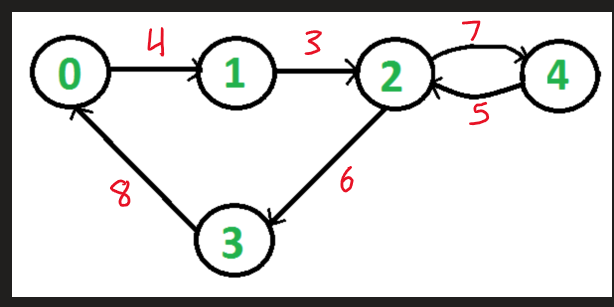

In [15]:
# check a weighted directed graph
num_nodes4 = 5
edges4 = [(0, 1, 4), (1, 2, 3), (2, 3, 6), (2, 4, 7), (4, 2, 5), (3, 0, 8)]

graph4 = Graph(num_nodes4, edges4, True, True)
graph4

0: [(1, 4)]
1: [(2, 3)]
2: [(3, 6), (4, 7)]
3: [(0, 8)]
4: [(2, 5)]

In [16]:
import jovian

In [17]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "jtsang02/python-graph-algorithms" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/jtsang02/python-graph-algorithms


'https://jovian.ai/jtsang02/python-graph-algorithms'

## Shortest Paths


> **Question**: Write a function to find the length of the shortest path between two nodes in a weighted directed graph.

<img src="https://i.imgur.com/Zn5cUkO.png" width="480">


**Dijkstra's algorithm (Wikipedia)**:

![](https://upload.wikimedia.org/wikipedia/commons/5/57/Dijkstra_Animation.gif)

1. Mark all nodes unvisited. Create a set of all the unvisited nodes called the unvisited set.
2. Assign to every node a tentative distance value: set it to zero for our initial node and to infinity for all other nodes. Set the initial node as current.[16]
3. For the current node, consider all of its unvisited neighbours and calculate their tentative distances through the current node. Compare the newly calculated tentative distance to the current assigned value and assign the smaller one. For example, if the current node A is marked with a distance of 6, and the edge connecting it with a neighbour B has length 2, then the distance to B through A will be 6 + 2 = 8. If B was previously marked with a distance greater than 8 then change it to 8. Otherwise, the current value will be kept.
4. When we are done considering all of the unvisited neighbours of the current node, mark the current node as visited and remove it from the unvisited set. A visited node will never be checked again.
5. If the destination node has been marked visited (when planning a route between two specific nodes) or if the smallest tentative distance among the nodes in the unvisited set is infinity (when planning a complete traversal; occurs when there is no connection between the initial node and remaining unvisited nodes), then stop. The algorithm has finished.
6. Otherwise, select the unvisited node that is marked with the smallest tentative distance, set it as the new "current node", and go back to step 3.

In [46]:
def shortest_path(graph, source, target):
    """Return the shortest distance between source and target"""
    visited = [False] * len(graph.data)
    parent = [None] * len(graph.data) # for visualizing the path
    distance = [float('inf')] * len(graph.data)
    queue = []
    
    # initialize
    distance[source] = 0
    queue.append(source)
    
    while queue and not visited[target]:
        curr = queue.pop(0)
        
        # update distances of all neighbors and mark current as visited
        update_distances(graph, curr, distance, parent)
        visited[curr] = True
        
        # find the first unvisited node w/ smallest distance
        next_node = pick_next_node(distance, visited)
        if next_node:
            queue.append(next_node)        
    
    return distance[target], parent

def update_distances(graph, current, distance, parent=None):
    """Update the distances of the current node's neighbors"""
    neighbors = graph.data[current]
    weights = graph.weight[current]
    for i, node in enumerate(neighbors):
        weight = weights[i]
        if distance[current] + weight < distance[node]:
            distance[node] = distance[current] + weight
            if parent:
                parent[node] = current

def pick_next_node(distance, visited):
    """Pick the next univisited node at the smallest distance"""
    min_distance = float('inf')
    min_node = None
    for node in range(len(distance)):
        if not visited[node] and distance[node] < min_distance:
            min_node = node
            min_distance = distance[node]
    return min_node

<img src="https://i.imgur.com/Zn5cUkO.png" width="480">

In [47]:
num_nodes7 = 6
edges7 = [(0, 1, 4), (0, 2, 2), (1, 2, 5), (1, 3, 10), (2, 4, 3), (4, 3, 4), (3, 5, 11)]
num_nodes7, len(edges7)

(6, 7)

In [48]:
graph7 = Graph(num_nodes7, edges7, True, True)
graph7

0: [(1, 4), (2, 2)]
1: [(2, 5), (3, 10)]
2: [(4, 3)]
3: [(5, 11)]
4: [(3, 4)]
5: []

In [49]:
shortest_path(graph7, 0, 5)

(20, [None, 0, 0, 4, 2, 3])

![](https://i.imgur.com/wy7ZHRW.png)

In [51]:
graph2

0: [(1, 3), (3, 2), (8, 4)]
1: [(0, 3), (7, 4)]
2: [(7, 2), (3, 6), (5, 1)]
3: [(0, 2), (2, 6), (4, 1)]
4: [(3, 1), (8, 8)]
5: [(2, 1), (6, 8)]
6: [(5, 8)]
7: [(1, 4), (2, 2)]
8: [(0, 4), (4, 8)]

In [52]:
shortest_path(graph2, 0, 7)

(7, [None, 0, 3, 0, 3, None, None, 1, 0])

In [59]:
shortest_path(graph2, 2, 8)

(15, [3, 7, None, 2, 3, 2, 5, 2, 4])

In [91]:
import jovian

In [92]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "aakashns/python-graph-algorithms" on https://jovian.ai/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/aakashns/python-graph-algorithms


'https://jovian.ai/aakashns/python-graph-algorithms'

### Binary Heap

A data structure to maintain the running minimum/maximum of a set of numbers, supporting efficient addition/removal.


<img src="https://i.imgur.com/ABAcM7m.png" width="400">


Heap operations:

- Insertion - $O(log N)$
- Min/Max - $O(1)$ (depending on type of heap)
- Deletion - $O(log N)$
- Convert a list to a heap - $O(n)$


Python's built-in heap: https://docs.python.org/3/library/heapq.html

> **Question**: Implement Dijkstra's shortest path algorithm using the `heap` module from Python. What is the complexity of the algorithm?

### More Problems

Solve more graph problems here: https://leetcode.com/tag/graph/

In [93]:
import jovian

In [94]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "aakashns/python-graph-algorithms" on https://jovian.ai/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/aakashns/python-graph-algorithms


'https://jovian.ai/aakashns/python-graph-algorithms'

## Solutions

![](https://i.imgur.com/E2Up1Pk.png)

### Input Data

In [26]:
num_nodes1 = 5
edges1 = [(0, 1), (1, 2), (2, 3), (3, 4), (4, 0), (1, 4), (1, 3)]
num_nodes1, len(edges1)

(5, 7)

In [25]:
num_nodes3 = 9
edges3 = [(0, 1), (0, 3), (1, 2), (2, 3), (4, 5), (4, 6), (5, 6), (7, 8)]
num_nodes3, len(edges3)

(9, 8)

In [15]:
num_nodes5 = 9
edges5 = [(0, 1, 3), (0, 3, 2), (0, 8, 4), (1, 7, 4), (2, 7, 2), (2, 3, 6), 
          (2, 5, 1), (3, 4, 1), (4, 8, 8), (5, 6, 8)]

num_nodes5, len(edges5)

(9, 10)

In [16]:
# Directed graph
num_nodes6 = 5
edges6 = [(0, 1), (1, 2), (2, 3), (2, 4), (4, 2), (3, 0)]
num_nodes6, len(edges6)

(5, 6)

In [29]:
num_nodes7 = 6
edges7 = [(0, 1, 4), (0, 2, 2), (1, 2, 5), (1, 3, 10), (2, 4, 3), (4, 3, 4), (3, 5, 11)]
num_nodes7, len(edges7)

(6, 7)

### Adjacency List

In [23]:
class Graph:
    def __init__(self, num_nodes, edges):
        self.data = [[] for _ in range(num_nodes)]
        for v1, v2 in edges:
            self.data[v1].append(v2)
            self.data[v2].append(v1)
            
    def __repr__(self):
        return "\n".join(["{} : {}".format(i, neighbors) for (i, neighbors) in enumerate(self.data)])

    def __str__(self):
        return repr(self)

In [21]:
g1 = Graph(num_nodes1, edges1)

In [22]:
g1

0 : [1, 4]
1 : [0, 2, 4, 3]
2 : [1, 3]
3 : [2, 4, 1]
4 : [3, 0, 1]

### Adjacency Matrix

### Breadth First Search

Complexity $O(m + n)$

In [37]:
def bfs(graph, source):
    visited = [False] * len(graph.data)
    queue = []
    
    visited[source] = True    
    queue.append(source)
    i = 0
    
    while i < len(queue):
        for v in graph.data[queue[i]]:
            if not visited[v]:
                visited[v] = True
                queue.append(v)
        i += 1
        
    return queue

In [39]:
bfs(g1, 3)

[3, 2, 4, 1, 0]

### Depth First Search

In [44]:
def dfs(graph, source):
    visited = [False] * len(graph.data)
    stack = [source]
    result = []
    
    while len(stack) > 0:
        current = stack.pop()
        if not visited[current]:
            result.append(current)
            visited[current] = True
            for v in graph.data[current]:
                stack.append(v)
                
    return result

In [45]:
dfs(g1, 0)

[0, 4, 1, 3, 2]

### Directed and Weighted Graph

In [67]:
class Graph:
    def __init__(self, num_nodes, edges, directed=False):
        self.data = [[] for _ in range(num_nodes)]
        self.weight = [[] for _ in range(num_nodes)]
        
        self.directed = directed
        self.weighted = len(edges) > 0 and len(edges[0]) == 3
            
        for e in edges:
            self.data[e[0]].append(e[1])
            if self.weighted:
                self.weight[e[0]].append(e[2])
            
            if not directed:
                self.data[e[1]].append(e[0])
                if self.weighted:
                    self.data[e[1]].append(e[2])
                
    def __repr__(self):
        result = ""
        for i in range(len(self.data)):
            pairs = list(zip(self.data[i], self.weight[i]))
            result += "{}: {}\n".format(i, pairs)
        return result

    def __str__(self):
        return repr(self)

In [68]:
g7 = Graph(num_nodes7, edges7, directed=True)

In [69]:
g7

0: [(1, 4), (2, 2)]
1: [(2, 5), (3, 10)]
2: [(4, 3)]
3: [(5, 11)]
4: [(3, 4)]
5: []

In [61]:
g7.weight

[2, 10, 3, 11, 4, []]

### Shortest Path - Dijkstra's Algorithm

In [83]:
def update_distances(graph, current, distance, parent=None):
    """Update the distances of the current node's neighbors"""
    neighbors = graph.data[current]
    weights = graph.weight[current]
    for i, node in enumerate(neighbors):
        weight = weights[i]
        if distance[current] + weight < distance[node]:
            distance[node] = distance[current] + weight
            if parent:
                parent[node] = current

def pick_next_node(distance, visited):
    """Pick the next univisited node at the smallest distance"""
    min_distance = float('inf')
    min_node = None
    for node in range(len(distance)):
        if not visited[node] and distance[node] < min_distance:
            min_node = node
            min_distance = distance[node]
    return min_node
        
def shortest_path(graph, source, dest):
    """Find the length of the shortest path between source and destination"""
    visited = [False] * len(graph.data)
    distance = [float('inf')] * len(graph.data)
    parent = [None] * len(graph.data)
    queue = []
    idx = 0
    
    queue.append(source)
    distance[source] = 0
    visited[source] = True
    
    while idx < len(queue) and not visited[dest]:
        current = queue[idx]
        update_distances(graph, current, distance, parent)
        
        next_node = pick_next_node(distance, visited)
        if next_node is not None:
            visited[next_node] = True
            queue.append(next_node)
        idx += 1
        
    return distance[dest], distance, parent

<img src="https://i.imgur.com/Zn5cUkO.png" width="400">

In [84]:
shortest_path(g7, 0, 5)

(20, [0, 4, 2, 9, 5, 20], [None, 0, 0, 4, 2, 3])

In [2]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
